[Data_School](https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)
[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
print(data.head())
print()
print(data.info())
print()
print(data.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB
None

(200, 4)


/Users/sungchul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


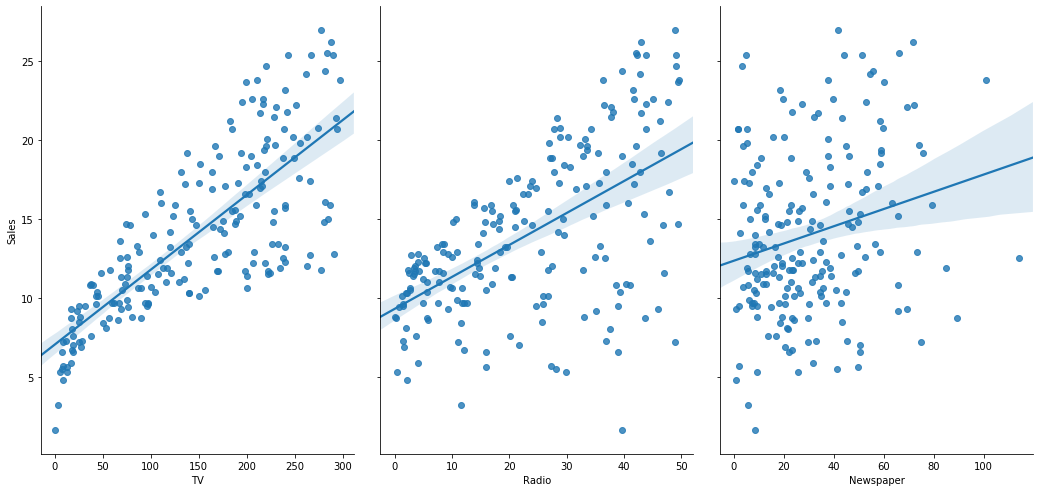

In [3]:
import seaborn as sns

sns.pairplot(data, 
             x_vars=['TV','Radio','Newspaper'], 
             y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [4]:
from sklearn.model_selection import train_test_split

feature_cols = ['TV', 'Radio', 'Newspaper'] 
X = data[feature_cols]
y = data['Sales']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 3)
(200,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 3)
(150,)
(50, 3)
(50,)


In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(reg.intercept_)
print(reg.coef_)
print()

feature_cols = ['TV', 'Radio', 'Newspaper'] 
print(list(zip(feature_cols, reg.coef_)))
print()

2.8769666223179318
[0.04656457 0.17915812 0.00345046]

[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804412)]



$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [7]:
import numpy as np
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.0668917082595213
1.9730456202283384
1.4046514230328955


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [8]:
import numpy as np

score = []

feature_cols = ['TV', 'Radio', 'Newspaper']
for feature_drop in feature_cols:
    feature_cols = ['TV', 'Radio', 'Newspaper']     
    feature_cols.remove(feature_drop)

    X_train_new = X_train[feature_cols]
    X_test_new = X_test[feature_cols]
    
    reg = LinearRegression()
    reg.fit(X_train_new, y_train)
    y_test_pred = reg.predict(X_test_new)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    score.append(rmse)
    
feature_cols = ['TV', 'Radio', 'Newspaper']
print(feature_cols) 
print(score)

['TV', 'Radio', 'Newspaper']
[3.748697497467727, 3.352056334433862, 1.3879034699382888]


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [8]:
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ TV', data).fit()
print(est.summary().tables[1])

est = smf.ols('Sales ~ Radio', data).fit()
print(est.summary().tables[1])

est = smf.ols('Sales ~ Newspaper', data).fit()
print(est.summary().tables[1])

est = smf.ols('Sales ~ TV + Radio + Newspaper', data).fit()
print(est.summary().tables[1])

est = smf.ols('Sales ~ TV + Radio', data).fit()
print(est.summary().tables[1])

est = smf.ols('Sales ~ TV + Radio + TV*Radio', data).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
                 coef    std err          t      P>|

In [9]:
import numpy as np

reg = LinearRegression()

feature_cols = ['TV', 'Radio']
X_train_new = X_train[feature_cols]
X_test_new = X_test[feature_cols]
    
reg.fit(X_train_new, y_train)
y_test_pred = reg.predict(X_test_new)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(rmse)

X_train_new['TV*Radio'] = X_train_new['TV'] * X_train_new['Radio']
X_test_new['TV*Radio'] = X_test_new['TV'] * X_test_new['Radio']
    
reg.fit(X_train_new, y_train)
y_test_pred = reg.predict(X_test_new)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(rmse)

1.3879034699382888
0.7011871137164326
